In [1]:
#Importing relavent Libraries
#import libraries
import pandas as pd
import numpy as np
import os

In [2]:
#ipmorting new Customer Df
path = r'/Users/ethanahennes/Desktop/instacart basket analysis'

In [3]:
df_cus = pd.read_csv(os.path.join(path,'02 data','Original Data','4.3_orders_products','customers.csv'), index_col = False)

In [ ]:
#Warngling New data Set

In [4]:
#First lets look at the coumn names and types
df_cus.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [5]:
# Making a copy of the Df to saftly make changes in
df_cus_2 = df_cus

In [13]:
#Looking at the coulmns there isnt any that look like they could be dropped, however lets go ahead annd rename the "Surname" Coulmn to "Last name for readablity
df_cus_2.rename(columns = {'Surnam':'Last Name'}, inplace = True)

In [10]:
df_cus_2.shape

(206209, 10)

In [14]:
df_cus_2.dtypes

user_id          int64
First Name      object
Last Name       object
Gender          object
STATE           object
Age              int64
date_joined     object
n_dependants     int64
fam_status      object
income           int64
dtype: object

In [15]:
#checking for consistancy
df_cus_2.describe()

,user_id,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


In [ ]:
# the Min, Max, and Mean for  my colmuns looks appropriate


In [17]:
#Check for any stange values with value counts
df_cus_2['First Name'].value_counts(dropna=False)

NaN        11259
Marilyn     2213
Barbara     2154
Todd        2113
Jeremy      2104
           ...  
Merry        197
Eugene       197
Garry        191
Ned          186
David        186
Name: First Name, Length: 208, dtype: int64

In [ ]:
# I found 11,259 NaN values in my 'First Name' column

In [18]:
# Checking in the 'Last Name' column
df_cus_2['Last Name'].value_counts(dropna = False)

Hamilton      252
Randall       248
Lamb          243
Pennington    243
Barnett       242
             ... 
Poole         172
Bauer         166
Pearson       164
Payne         163
Jordan        162
Name: Last Name, Length: 1000, dtype: int64

In [19]:
df_cus_2['Last Name'].isna().sum()

0

In [20]:
df_cus_2['First Name'].isna().sum()

11259

In [ ]:
#No na values in my 'Last name' columnb

In [21]:
df_cus_2.isna().sum()

user_id             0
First Name      11259
Last Name           0
Gender              0
STATE               0
Age                 0
date_joined         0
n_dependants        0
fam_status          0
income              0
dtype: int64

In [22]:
# About 5% of my data has an "na" value in the 'First Name' column.
# My next step is to invistegate further and contact my stakeholder and oresnt them with options
# I will Continue as if my Client requested I keep the Na 'first names'

In [ ]:
# I am not checking for Mixed data types as I know the data set has already been cleaned for these


In [25]:
df_nan = df_cus_2[df_cus_2['First Name'].isnull() == True]

In [26]:
df_nan

,user_id,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
53,76659,NaN,Gilbert,Male,Colorado,26,1/1/2017,2,married,41709
73,13738,NaN,Frost,Female,Louisiana,39,1/1/2017,0,single,82518
82,89996,NaN,Dawson,Female,Oregon,52,1/1/2017,3,married,117099
99,96166,NaN,Oconnor,Male,Oklahoma,51,1/1/2017,1,married,155673
105,29778,NaN,Dawson,Female,Utah,63,1/1/2017,3,married,151819
...,...,...,...,...,...,...,...,...,...,...
206038,121317,NaN,Melton,Male,Pennsylvania,28,3/31/2020,3,married,87783
206044,200799,NaN,Copeland,Female,Hawaii,52,4/1/2020,2,married,108488
206090,167394,NaN,Frost,Female,Hawaii,61,4/1/2020,1,married,45275
206162,187532,NaN,Floyd,Female,California,39,4/1/2020,0,single,56325


In [27]:
#searching for duplicates by crteating a duplicate only df
df_dups = df_cus_2[df_cus_2.duplicated()]

In [28]:
df_dups

,user_id,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income


<AxesSubplot:ylabel='Frequency'>

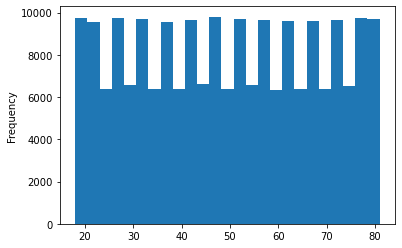

In [30]:
#using histograms to check for outliers
df_cus_2['Age'].plot.hist(bins=25)

<AxesSubplot:ylabel='Frequency'>

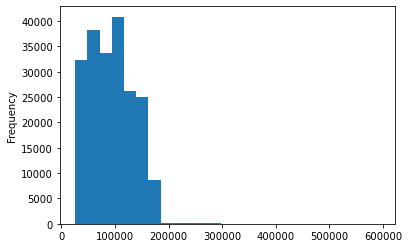

In [31]:
df_cus_2['income'].plot.hist(bins=25)

In [32]:
#Conbing Both Data Sets
#First importing the large data set
df_ords_prods = pd.read_pickle(os.path.join(path,'02 Data','Pepared Data','4.8 changes with agg.pkl'))

In [36]:
#lets remove some un needed columns from my largeer DF
df_ords_prods.dtypes

Unnamed: 0_x                int64
product_id                  int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
Unnamed: 0.1                int64
Unnamed: 0_y                int64
order_id                    int64
user_id                     int64
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_from_last_order      float64
add_to_cart_order           int64
reordered                   int64
_merge                   category
price_range_loc            object
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
average_pricve            float64
average_price             float64
price_flag                 object
average_frequency         float64
frequency_flag             object
dtype: object

In [41]:
# I have a few unesccary or duplicate columns lets invetigate and remove
df_ords_prods['average_pricve'].value_counts(dropna = False) 
              
              

8.000000     10344
7.500000      9116
8.100000      8232
7.400000      7044
7.750000      7040
             ...  
11.933333        3
13.800000        3
12.033333        3
9.733333         3
8.066667         3
Name: average_pricve, Length: 128623, dtype: int64

In [42]:
df_ords_prods['average_price'].value_counts(dropna = False) 

8.000000     10344
7.500000      9116
8.100000      8232
7.400000      7044
7.750000      7040
             ...  
11.933333        3
13.800000        3
12.033333        3
9.733333         3
8.066667         3
Name: average_price, Length: 128623, dtype: int64

In [ ]:
#'Average_price' and ' average_pricve' are duplicate coulmns

In [43]:
#creating a new Df for large Df to clean saftly
df_large_clean = df_ords_prods

In [44]:
df_large_clean.drop(columns =['Unnamed: 0_x','Unnamed: 0.1','Unnamed: 0_y','average_pricve'])

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,price_flag,average_frequency,frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,both,Mid ranged product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,10.400000,regular_customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,both,Mid ranged product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,10.400000,regular_customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,both,Mid ranged product,Most busy day,Average orders,5,New customer,7.930208,Low spender,7.070968,frequent Customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,both,Mid ranged product,Second least busy day,Average orders,3,New customer,4.972414,Low spender,10.948718,regular_customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,both,Mid ranged product,Least busy day,Average orders,3,New customer,4.972414,Low spender,10.948718,regular_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,49688,Fresh Foaming Cleanser,73,11,13.5,1788356,200215,2,0,9,...,both,Mid ranged product,Most busy day,Average orders,6,New customer,8.220313,Low spender,14.162162,regular_customer
32404855,49688,Fresh Foaming Cleanser,73,11,13.5,3401313,200377,1,4,11,...,both,Mid ranged product,Least busy day,Average orders,4,New customer,7.364516,Low spender,22.816327,Non-frequent Customer
32404856,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,5,3,8,...,both,Mid ranged product,Second least busy day,Average orders,20,Regular customer,8.500344,Low spender,10.946970,regular_customer
32404857,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,9,3,15,...,both,Mid ranged product,Second least busy day,Average orders,20,Regular customer,8.500344,Low spender,10.946970,regular_customer


In [48]:
df_test_left = df_large_clean

In [46]:
#combining Both sets
#First getting the shape of each
df_large_clean.shape

(32404859, 27)

In [47]:
df_cus_2.shape

(206209, 10)

In [50]:
#combing data sets on key 'user_id'
#using a left join to keep only data from the large Df the match as an Inner join would result in a large loss of data
df_test_left=df_large_clean.merge(df_cus_2, on = 'user_id',how = 'left')


In [51]:
df_test_left.shape

(32404859, 36)

In [52]:
df_test_left.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,user_id,...,frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,1987,3139998,138,...,regular_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1989,1977647,138,...,regular_customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,11433,11433,389851,709,...,frequent Customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,12198,12198,652770,764,...,regular_customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,12200,12200,1813452,764,...,regular_customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


In [54]:
df_test_left.dtypes

Unnamed: 0_x                int64
product_id                  int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
Unnamed: 0.1                int64
Unnamed: 0_y                int64
order_id                    int64
user_id                     int64
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_from_last_order      float64
add_to_cart_order           int64
reordered                   int64
_merge                   category
price_range_loc            object
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
average_pricve            float64
average_price             float64
price_flag                 object
average_frequency         float64
frequency_flag             object
First Name                 object
Last Name                  object
Gender        

In [55]:
#exporting as a pickle file
df_test_left.to_pickle(os.path.join(path,'02 Data','Pepared Data','4.9 Joined with Customer.pkl'))

